In [1]:
!nvidia-smi

Wed Sep 25 21:43:30 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def generateCauchyData(N, mean):
    return (np.random.standard_cauchy(N) * 100. + mean)

In [0]:
data = generateCauchyData(10000, 42.)

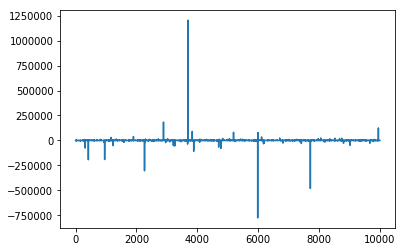

In [5]:
plt.plot(data)
plt.show()

In [0]:
def frequentistCenter(data):
    return np.mean(data)

In [7]:
X = frequentistCenter(data)
print("Sample mean: ", X)

Sample mean:  -32.233152217001745


In [0]:
def bayesianCenter(data):

    with pm.Model():
        loc = pm.Uniform('location', lower=-1000., upper=1000.)
        scale = pm.Uniform('scale', lower=0.01, upper=1000.)

        pm.Cauchy('y', alpha=loc, beta=scale, observed=data)

        trace = pm.sample(3000, tune=3000, target_accept=0.92)
        # pm.traceplot(trace)
        # plt.show()

    return np.mean(trace['location'])



In [14]:
X2 = bayesianCenter(data)

print("Bayesian mode (median, location): ", X2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [scale, location]
100%|██████████| 6000/6000 [00:24<00:00, 243.35it/s]


Bayesian mode (median, location):  41.68356653609901
